[*********************100%%**********************]  1 of 1 completed


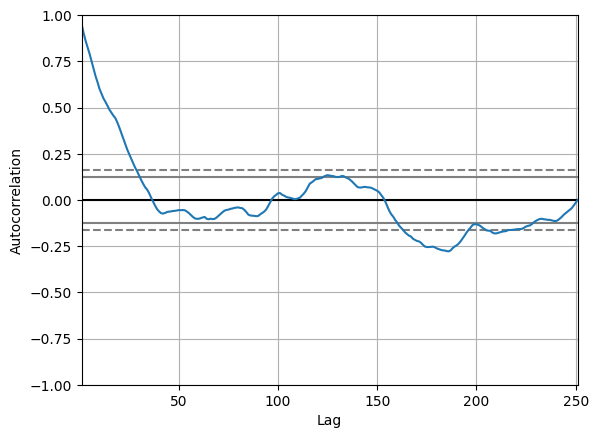

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Mean Squared Error: 53.26037356820251


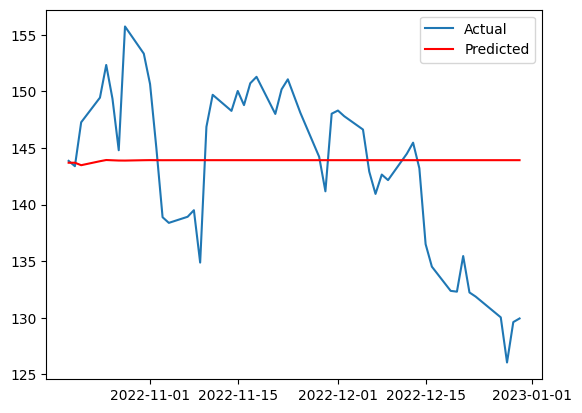

In [3]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import yfinance as yf
# Example usage
ticker = 'AAPL'
start_date = '2022-01-01'
end_date = '2022-12-31'

# Load data
df = yf.download(ticker, start=start_date, end=end_date)
# Autocorrelation plot
pd.plotting.autocorrelation_plot(df['Close'])
plt.show()

# Train-test split
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# ARIMA model
model = ARIMA(train['Close'], order=(5,1,0))
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

# Evaluate the model
mse = mean_squared_error(test['Close'], predictions)
print(f'Mean Squared Error: {mse}')

# Visualize the results
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.legend()
plt.show()
